In [1]:
from utils import *
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
font_style ={
    'font.size': 20,
    'font.family': 'Arial',
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
}
sns.set_theme(style='darkgrid', palette='RdBu')

### 1.Read and wash data

In [3]:
data = pd.read_csv('data_bin.csv') # data_multiClass
df = data.drop('Unnamed: 0', axis=1)
df

,640,641,642,643,644,645,646,647,648,649,...,1042,1043,1044,1045,1046,1047,1048,1049,1050,category
0,0.126331,0.126273,0.126215,0.126215,0.126040,0.125808,0.125634,0.125692,0.125866,0.125808,...,0.149905,0.149783,0.149538,0.149231,0.148803,0.148253,0.147764,0.147642,0.147947,1
1,0.142547,0.142366,0.142245,0.142185,0.142065,0.141824,0.141403,0.141042,0.140742,0.140561,...,0.177309,0.177113,0.176330,0.175094,0.174055,0.173472,0.173277,0.172825,0.171920,1
2,0.067932,0.068034,0.068135,0.068186,0.068186,0.068288,0.068390,0.068593,0.068898,0.069357,...,0.127844,0.127494,0.127669,0.127494,0.126040,0.125228,0.125344,0.124707,0.123955,1
3,0.033483,0.033342,0.033248,0.033201,0.033108,0.032920,0.032733,0.032592,0.032546,0.032686,...,0.085551,0.086557,0.086557,0.085287,0.083757,0.083073,0.083336,0.083599,0.083651,1
4,0.082862,0.082862,0.082967,0.083073,0.083020,0.082915,0.082810,0.082862,0.083125,0.083493,...,0.142969,0.142366,0.142607,0.142547,0.141102,0.140381,0.140621,0.139542,0.138764,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,0.187421,0.186953,0.186419,0.185952,0.185553,0.185153,0.184821,0.184489,0.184090,0.183825,...,0.093557,0.093396,0.093503,0.093611,0.093611,0.092965,0.091890,0.091461,0.091301,0
2562,0.223226,0.222863,0.222501,0.222138,0.221776,0.221415,0.221126,0.220764,0.220404,0.220187,...,0.138048,0.138346,0.138585,0.137690,0.135608,0.134896,0.135726,0.135548,0.134837,0
2563,0.216168,0.215954,0.215597,0.215169,0.214670,0.214243,0.213888,0.213604,0.213391,0.213249,...,0.137988,0.136499,0.136083,0.135964,0.134955,0.134541,0.135015,0.135074,0.134363,0
2564,0.246340,0.245958,0.245422,0.244888,0.244430,0.244201,0.244049,0.243744,0.243288,0.242832,...,0.173277,0.171340,0.171405,0.171920,0.170632,0.169925,0.170632,0.170761,0.169861,0


In [52]:
missing_values = data.isnull().sum().sum()
print(f'Number of null value: {missing_values}')

Number of null value: 0


In [72]:
category_counts = df['category'].value_counts()
category_counts

category
1    1328
0    1238
Name: count, dtype: int64

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

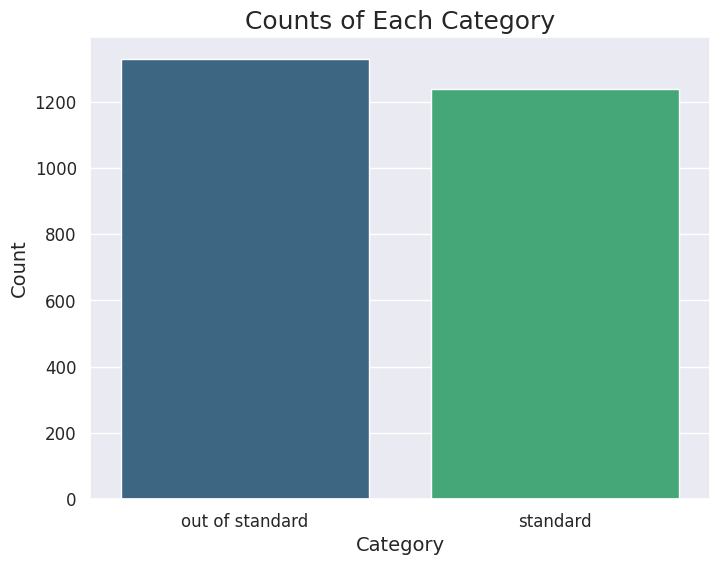

In [15]:
# 计算类别计数
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Update category labels
category_counts['category'] = category_counts['category'].replace({0: 'standard', 1: 'out of standard'})

plt.rcParams.update(font_style)
# Plot category counts using Seaborn with updated labels and avoiding deprecated usage
plt.figure(figsize=(8, 6))
sns.barplot(x='category', y='count', data=category_counts, hue='category', palette='viridis', legend=False)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Each Category')
plt.show()

In [4]:
binary_data = pd.read_csv('data_bin.csv') # data_multiClass
binary_data = binary_data.drop('Unnamed: 0', axis=1)
binary_data

,640,641,642,643,644,645,646,647,648,649,...,1042,1043,1044,1045,1046,1047,1048,1049,1050,category
0,0.126331,0.126273,0.126215,0.126215,0.126040,0.125808,0.125634,0.125692,0.125866,0.125808,...,0.149905,0.149783,0.149538,0.149231,0.148803,0.148253,0.147764,0.147642,0.147947,1
1,0.142547,0.142366,0.142245,0.142185,0.142065,0.141824,0.141403,0.141042,0.140742,0.140561,...,0.177309,0.177113,0.176330,0.175094,0.174055,0.173472,0.173277,0.172825,0.171920,1
2,0.067932,0.068034,0.068135,0.068186,0.068186,0.068288,0.068390,0.068593,0.068898,0.069357,...,0.127844,0.127494,0.127669,0.127494,0.126040,0.125228,0.125344,0.124707,0.123955,1
3,0.033483,0.033342,0.033248,0.033201,0.033108,0.032920,0.032733,0.032592,0.032546,0.032686,...,0.085551,0.086557,0.086557,0.085287,0.083757,0.083073,0.083336,0.083599,0.083651,1
4,0.082862,0.082862,0.082967,0.083073,0.083020,0.082915,0.082810,0.082862,0.083125,0.083493,...,0.142969,0.142366,0.142607,0.142547,0.141102,0.140381,0.140621,0.139542,0.138764,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,0.187421,0.186953,0.186419,0.185952,0.185553,0.185153,0.184821,0.184489,0.184090,0.183825,...,0.093557,0.093396,0.093503,0.093611,0.093611,0.092965,0.091890,0.091461,0.091301,0
2562,0.223226,0.222863,0.222501,0.222138,0.221776,0.221415,0.221126,0.220764,0.220404,0.220187,...,0.138048,0.138346,0.138585,0.137690,0.135608,0.134896,0.135726,0.135548,0.134837,0
2563,0.216168,0.215954,0.215597,0.215169,0.214670,0.214243,0.213888,0.213604,0.213391,0.213249,...,0.137988,0.136499,0.136083,0.135964,0.134955,0.134541,0.135015,0.135074,0.134363,0
2564,0.246340,0.245958,0.245422,0.244888,0.244430,0.244201,0.244049,0.243744,0.243288,0.242832,...,0.173277,0.171340,0.171405,0.171920,0.170632,0.169925,0.170632,0.170761,0.169861,0


In [5]:
# 特征和标签
X = binary_data.drop('category', axis=1)
y = binary_data['category']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train.shape

(1539, 411)

### Step 2: RandomForest

In [8]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [9]:
# 训练随机森林分类模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 预测和评估
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7672833495618305
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       489
           1       0.78      0.77      0.78       538

    accuracy                           0.77      1027
   macro avg       0.77      0.77      0.77      1027
weighted avg       0.77      0.77      0.77      1027



In [10]:
# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_rf = grid_search.best_estimator_

# 预测和评估
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'accuracy: {accuracy}')
print('report:')
print(report)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
accuracy: 0.7526777020447907
report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       489
           1       0.77      0.76      0.76       538

    accuracy                           0.75      1027
   macro avg       0.75      0.75      0.75      1027
weighted avg       0.75      0.75      0.75      1027



{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
{'max_depth': None, 'min_samples_

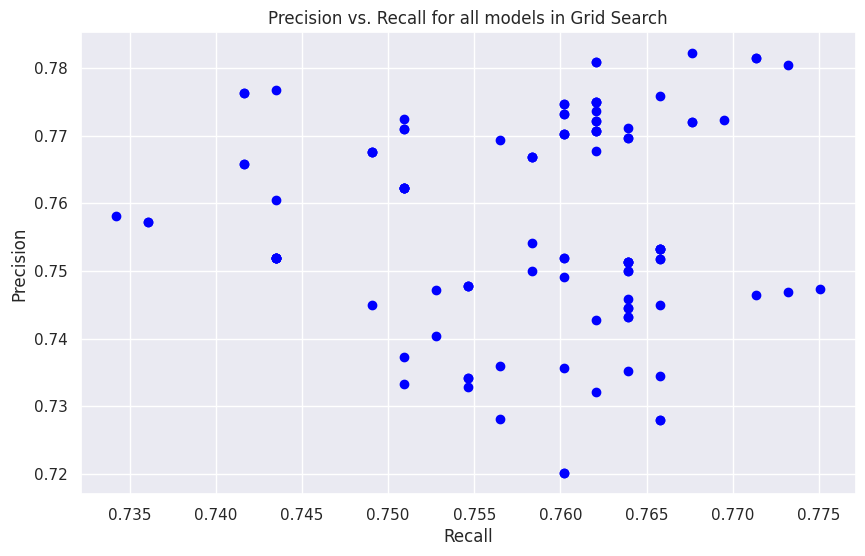

In [11]:
precisions = []
recalls = []

for params, mean_test_score, mean_train_score in zip(grid_search.cv_results_['params'], 
                                                     grid_search.cv_results_['mean_test_score'], 
                                                     grid_search.cv_results_['mean_train_score']):
    print(params)
    # 设置模型参数并重新训练
    rf.set_params(**params)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    precisions.append(precision)
    recalls.append(recall)

# 绘制所有模型的精确度和召回率
plt.figure(figsize=(10, 6))
plt.scatter(recalls, precisions, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall for all models in Grid Search')
plt.grid(True)
plt.show()

### Step 3: Support vector Machine (SVM)

In [9]:
# # 标准化特征
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# 定义SVM模型和参数网格
svm = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_svm = grid_search.best_estimator_

# 预测和评估
y_pred_svm = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm)

print(f'最佳超参数: {grid_search.best_params_}')
print(f'准确率: {accuracy}')
print('分类报告:')
print(report)

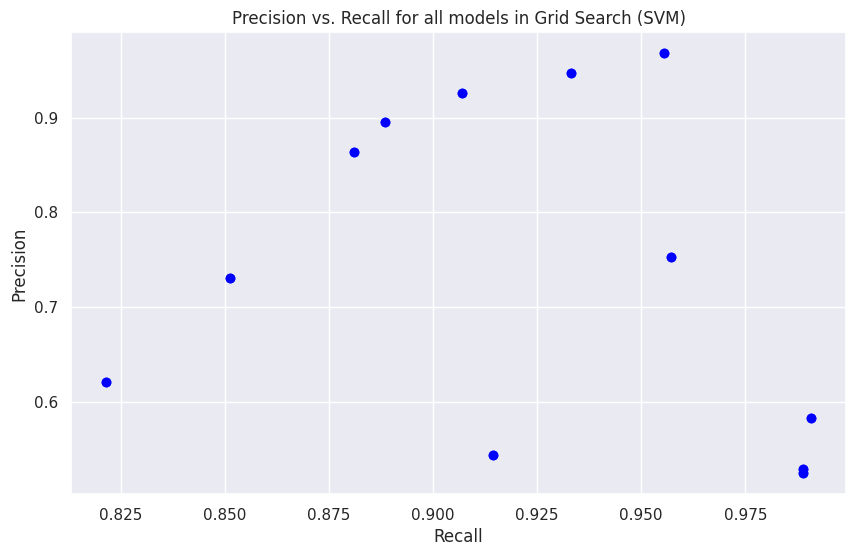

In [13]:
# 收集每个模型的精确度和召回率
precisions = []
recalls = []

for params, mean_test_score, mean_train_score in zip(grid_search.cv_results_['params'], 
                                                     grid_search.cv_results_['mean_test_score'], 
                                                     grid_search.cv_results_['mean_train_score']):
    svm.set_params(**params)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='binary')
    precisions.append(precision)
    recalls.append(recall)

# 绘制所有模型的精确度和召回率
plt.figure(figsize=(10, 6))
plt.scatter(recalls, precisions, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall for all models in Grid Search (SVM)')
plt.grid(True)
plt.show()

In [90]:
recalls

[0.8810408921933085,
 0.9144981412639405,
 0.9888475836431226,
 0.8810408921933085,
 0.9144981412639405,
 0.9888475836431226,
 0.9070631970260223,
 0.8215613382899628,
 0.9888475836431226,
 0.9070631970260223,
 0.8215613382899628,
 0.9888475836431226,
 0.9330855018587361,
 0.8513011152416357,
 0.9907063197026023,
 0.9330855018587361,
 0.8513011152416357,
 0.9907063197026023,
 0.9553903345724907,
 0.8884758364312267,
 0.9572490706319703,
 0.9553903345724907,
 0.8884758364312267,
 0.9572490706319703]

In [ ]:
precisions = []
recalls = []

for params, _ in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    svm.set_params(**params)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='binary')
    precisions.append(precision)
    recalls.append(recall)

# 绘制所有模型的精确度和召回率
plt.figure(figsize=(10, 6))
plt.scatter(recalls, precisions, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall for all models in Grid Search (SVM)')
plt.grid(True)
plt.show()